In [ ]:
# from PIL import Image
# from matplotlib import pyplot as plt

# 方法1
# plt.imshow(Image.open(''./SE-block.png''))  #plt 画图显示 （坐标）

## 方法2
# img = Image.open('./SE-block.png')
# img.show()  # 使用本地的图片打开器  显示图片 

## 方法3   但只能在python脚本中使用，jupyter notebook  无法使用
# import cv2
# cv2.imread('./SE-block.png')
# cv2.imshow('Image', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

## 方法4 
from IPython.display import Image, display
 
img_path = './SE-block.png'
display(Image(filename=img_path))

模板匹配是指在当前图像 A 内寻找与图像 B 最相似的部分，一般将图像 A 称为输入图像，将图像 B 称为模板图像。
模板匹配的操作方法是将模板图像 B 在图像 A 上滑动，遍历所有像素以完成匹配。

在 OpenCV 内，模板匹配是使用函数 cv2.matchTemplate()实现的。该函数的语法格式为：：
result = cv2.matchTemplate(image, templ, method[, mask ] )
image 为原始图像，必须是 8 位或者 32 位的浮点型图像。
templ 为模板图像。它的尺寸必须小于或等于原始图像，并且与原始图像具有同样的类型。
method 为匹配方法。该参数通过 TemplateMatchModes 实现，有 6 种可能的值，如下表所示。

1. mask 为模板图像掩模。它必须和模板图像 templ 具有相同的类型和大小。通常情况下，该值使用默认值即可。当前，该参数仅支持 TM_SQDIFF 和 TM_CCORR_NORMED 两个值。
函数 cv2.matchTemplate()的返回值 result 是由每个位置的比较结果组合所构成的一个结果集，类型是单通道 32 位浮点型。如果输入图像（原始图像）尺寸是 W ∗ H W*H W∗H，模板的尺寸是 w ∗ h w*h w∗h，则返回值的大小为 ( W − w + 1 ) ∗ ( H − h + 1 ) (W-w+1)*(H-h+1) (W−w+1)∗(H−h+1)。
2. 在进行模板匹配时，模板在原始图像内遍历。
  在水平方向上：
    遍历的起始坐标是原始图像左数第 1 个像素值（序号从 1 开始）。
    最后一次比较是当模板图像位于原始图像的最右侧时，此时其左上角像素点所在的位置是 W − w + 1 W-w+1 W−w+1。
    因此，返回值 result 在水平方向上的大小是 W − w + 1 W-w+1 W−w+1（水平方向上的比较次数）。
  在垂直方向上：
遍历的起始坐标从原始图像顶端的第 1 个像素开始。
最后一次比较是当模板图像位于原始图像的最下端时，此时其左上角像素点所在位置是 H − h + 1 H-h+1 H−h+1。
所以，返回值 result 在垂直方向上的大小是 H − h + 1 H-h+1 H−h+1（垂直方向上的比较次数）。
如果原始图像尺寸是 W*H，模板的尺寸是 w ∗ h w*h w∗h，则返回值的大小为 ( W − w + 1 ) ∗ ( H − h + 1 ) (W-w+1)*(H-h+1) (W−w+1)∗(H−h+1)。也
就是说，模板图像要在输入图像内比较 ( W − w + 1 ) ∗ ( H − h + 1 ) (W-w+1)*(H-h+1) (W−w+1)∗(H−h+1)次。
    注意：函数 cv2.matchTemplate()通过参数 method 来决定使用不同的查找方法。对于不同的查找方法，返回值 result 具有不同的含义。例如：
method 的值为 cv2.TM_SQDIFF 和 cv2.TM_SQDIFF_NORMED 时，result 值为 0 表示匹配度最好，值越大，表示匹配度越差。
method 的值为 cv2.TM_CCORR、cv2.TM_CCORR_NORMED、cv2.TM_CCOEFF 和 cv2.TM_CCOEFF_NORMED 时，result 的值越小表示匹配度越差，值越大表示匹配度越好。
    从上述分析可以看出，查找方法不同，结果的判定方式也不同。在查找最佳匹配时，首先要确定使用的是何种 method，然后再确定到底是查找最大值，还是查找最小值。
3. 查找最值（极值）与最值所在的位置，可以使用 cv2.minMaxLoc()函数实现。该函数语法格式如下：
  minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc( src [, mask] )
`src 为单通道数组。
minVal 为返回的最小值，如果没有最小值，则可以是 NULL（空值）。
maxVal 为返回的最大值，如果没有最小值，则可以是 NULL。
minLoc 为最大值的位置，如果没有最大值，则可以是 NULL。
maxLoc 为最大值的位置，如果没有最大值，则可以是 NULL。
mask 为用来选取掩模的子集，可选项.`
函数 cv2.minMaxLoc()能够查找整个数组内的最值及它们的位置，并且可以根据当前的掩模集来选取特定子集的极值。
综上所述，函数 cv2.matchTemplate()返回值中的最值位置就是模板匹配的位置。
函数cv2.minMaxLoc()来查找函数 cv2.matchTemplate()返回值中的最值位置，就可以找到最佳模板匹配的位置。


In [13]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# 读取原始图片
img = cv2.imread('./image/cat.jpg',0)
# 读取模板图片
template = cv2.imread('./image/temp.jpg',0)

(Text(0.5, 1.0, 'Origin Image'), ([], []), ([], []))

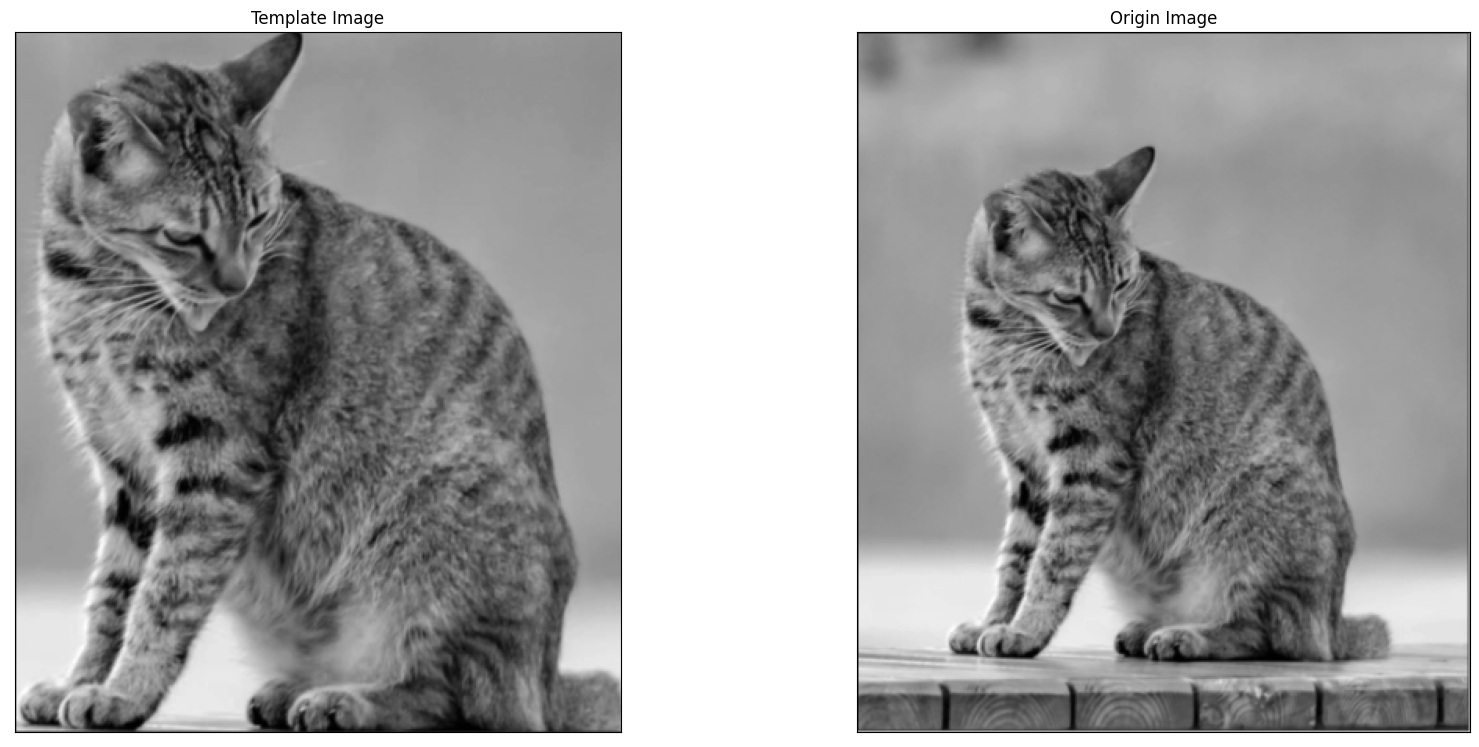

In [14]:
# 显示图片
plt.figure(figsize=(20, 20))
plt.subplot(221),plt.imshow(template,cmap = 'gray')
plt.title('Template Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img,cmap = 'gray')
plt.title('Origin Image'), plt.xticks([]), plt.yticks([])

[[4.4619130e+08 4.4646058e+08 4.4584390e+08 4.4531395e+08 4.4513635e+08
  4.4599584e+08 4.4648534e+08]
 [4.4377290e+08 4.4394310e+08 4.4326867e+08 4.4276832e+08 4.4260922e+08
  4.4346208e+08 4.4393280e+08]
 [4.4806973e+08 4.4813702e+08 4.4746064e+08 4.4703578e+08 4.4689930e+08
  4.4772144e+08 4.4813245e+08]]


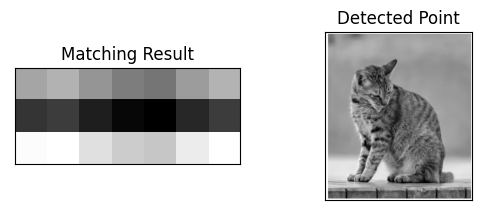

In [15]:
# 获取模板图片的高和宽
th, tw = template.shape[::]
# rv是由每个位置的比较结果组合所构成的一个结果集，类型是单通道 32 位浮点型。
rv = cv2.matchTemplate(img,template,cv2.TM_SQDIFF)
print(rv)
# 查找最值（极值）与最值所在的位置
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(rv)
# 左上角位置坐标
topLeft = minLoc 
# 右下角位置坐标
bottomRight = (topLeft[0] + tw, topLeft[1] + th) 
# 绘制矩形
cv2.rectangle(img,topLeft, bottomRight, 255, 5)
# 显示图片
plt.subplot(223),plt.imshow(rv,cmap = 'gray')
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(img,cmap = 'gray')
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()

(Text(0.5, 1.0, 'Origin Image'), ([], []), ([], []))

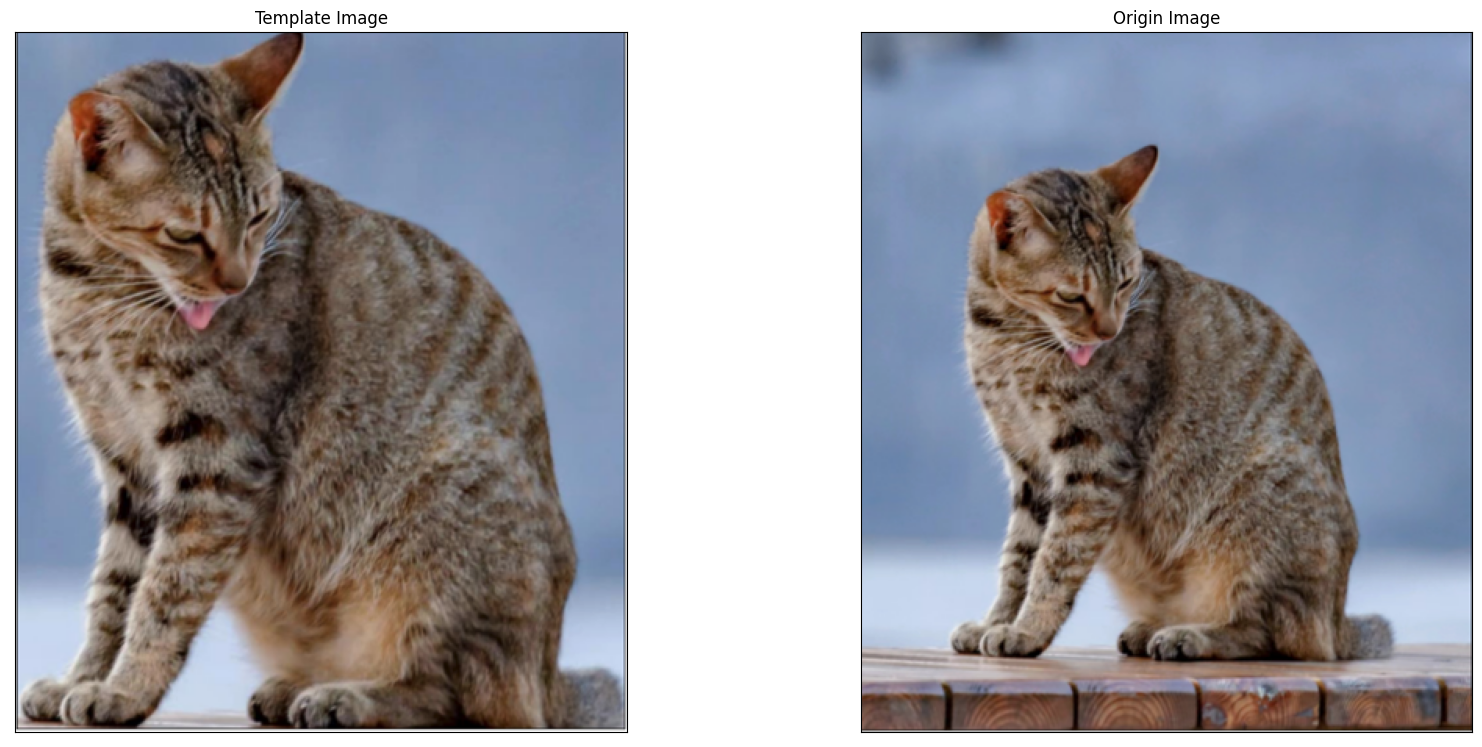

In [16]:
img = cv2.imread('./image/cat2.jpg')
# BGR -> RGB
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
# 读取模板图片
template = cv2.imread('./image/temp2.jpg')
# BGR -> RGB
template = cv2.cvtColor(template,cv2.COLOR_BGR2RGB)

# 显示图片
plt.figure(figsize=(20, 20))
plt.subplot(221),plt.imshow(template)
plt.title('Template Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img)
plt.title('Origin Image'), plt.xticks([]), plt.yticks([])

[[1.6612506e+09 1.6446734e+09]]


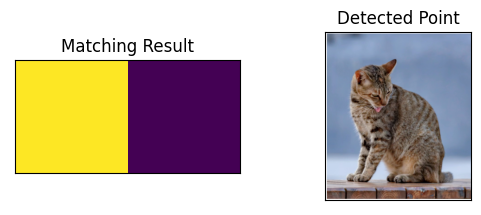

In [18]:
# 获取模板图片的高和宽
th, tw = template.shape[0],template.shape[1]
# rv是由每个位置的比较结果组合所构成的一个结果集，类型是单通道 32 位浮点型。
rv = cv2.matchTemplate(img,template,cv2.TM_SQDIFF)
print(rv)
# 查找最值（极值）与最值所在的位置
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(rv)
# 左上角位置坐标
topLeft = minLoc
# 右下角角位置坐标
bottomRight = (topLeft[0] + tw, topLeft[1] + th)
# 绘制矩形
cv2.rectangle(img,topLeft, bottomRight, (255,255,255), 5)
# 显示图片
plt.subplot(223),plt.imshow(rv)
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(img)
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()

(Text(0.5, 1.0, 'Origin Image'), ([], []), ([], []))

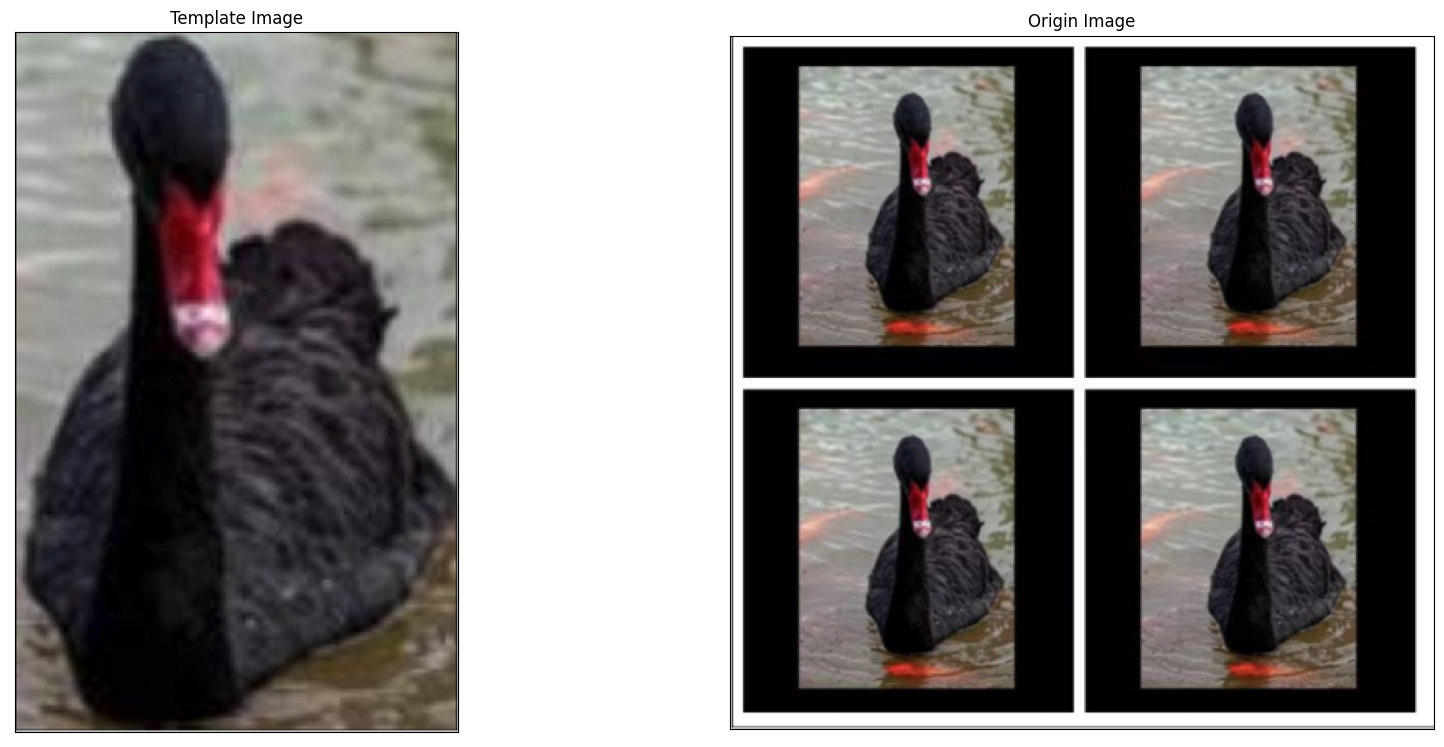

In [19]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# 读取原始图片
img = cv2.imread('./image/geese.jpg',0)
# BGR -> RGB
img_BGR = cv2.imread('./image/geese.jpg')
img_RGB = cv2.cvtColor(img_BGR,cv2.COLOR_BGR2RGB)
# 读取模板图片
template = cv2.imread('./image/goose.jpg',0)
# BGR -> RGB
template_BGR = cv2.imread('./image/goose.jpg')
template_RGB = cv2.cvtColor(template_BGR,cv2.COLOR_BGR2RGB)

# 显示图片
plt.figure(figsize=(20, 20))
plt.subplot(221),plt.imshow(template_RGB)
plt.title('Template Image'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(img_RGB)
plt.title('Origin Image'), plt.xticks([]), plt.yticks([])


[[-1.90686397e-02 -1.10901492e-02 -1.72558874e-02 -2.14455873e-02
  -2.58934516e-02 -3.06515601e-02 -3.57430615e-02 -3.99554335e-02
  -3.15270834e-02 -2.33524013e-02 -1.55472141e-02 -7.68157374e-03
   1.25447419e-04  7.78637175e-03  1.52749401e-02  2.24061366e-02
   2.91759521e-02  3.55706774e-02  4.16417345e-02  4.75149825e-02
   5.31826466e-02  5.86181618e-02  6.38311952e-02  6.89706132e-02
   7.39578754e-02  7.85158724e-02  8.28076228e-02  8.69202465e-02
   9.08741280e-02  9.44866389e-02  9.79092866e-02  1.01031117e-01
   1.03820249e-01  1.06421642e-01  1.09103434e-01  1.11784965e-01
   1.14640936e-01  1.17586315e-01  1.20690830e-01  1.23845883e-01
   1.26926407e-01  1.27821743e-01  1.23470880e-01  1.18367851e-01
   1.13039292e-01  1.06754936e-01  9.97161716e-02  9.36608911e-02
   8.79568383e-02  8.27965587e-02  7.83465207e-02  7.46866465e-02
   7.19624460e-02  6.97596297e-02  6.81129247e-02  6.68261796e-02
   6.57236800e-02  6.48344159e-02  6.42450750e-02  6.39638305e-02
   6.36794

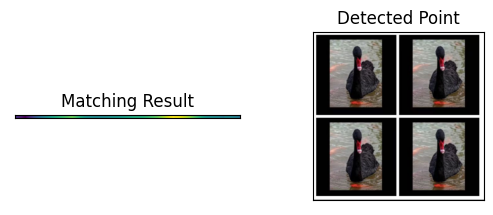

In [20]:
# 获取模板图片的高和宽
w, h = template.shape[::-1]
# res是由每个位置的比较结果组合所构成的一个结果集，类型是单通道 32 位浮点型。
res = cv2.matchTemplate(img,template,cv2.TM_CCOEFF_NORMED)
print(res)
# 阈值
threshold = 0.9
# 位置结果集
loc = np.where(res >= threshold) # 将大于threshold的结果位置，保存下来
# 遍历位置结果，绘制矩形
for pt in zip(*loc[::-1]): 
    cv2.rectangle(img_RGB, pt, (pt[0] + w, pt[1] + h), (255,255,255), 1)

# 显示图片
plt.subplot(223),plt.imshow(res)
plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(img_RGB)
plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
import cv2                           # 导入cv2库，cv2又叫opencv-python
img = cv2.imread("./image/000.jpg")  # 注意不在同一目录下的文件目标读取方式
print(img.shape)                     # (655, 655, 3)
print(img.size)                      # 1287075
b,g,r = img[6,40]                    # 查看某个像素点的颜色组成
print(b,g,r)                         # 255 255 255
img[6,10] = (0,0,0)                  # 改变某一个像素点的颜色组成，直接赋值即可
cv2.imshow("hah",img)                # 参数给定需要先给一个题目，再给输出图片名称
cv2.waitKey(0)                       # 等待，要不只显示一下就关闭窗口了
cv2.destroyAllWindows()

(864, 1152, 3)
2985984
215 204 206
